In [1]:
import pickle, sys, os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import LogLocator

In [2]:
import NNMFit
from NNMFit.utilities.readout_graphs import HistogramGraph
from NNMFit.core.analysis_config import AnalysisConfig

In [3]:
sys.path.append("/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/notebooks")
from plot_utils import *

Lets add some systematics!!

In [24]:
configs_dir = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/configs/flavor_globalfit/"
config_hdl_systematics = AnalysisConfig.from_configs(
        main_config_file=f"{configs_dir}/main.cfg",
        analysis_config_file = f"{configs_dir}/analysis_configs/asimov/SAY/asimov_SAY_HESEBestfit.yaml",
        config_dir=configs_dir,
        override_dict=None,
        override_config_files=None,
        override_components_files=None,
        override_parameters_files=None)
# build a histogram
hist_graph_hdl_systematics = HistogramGraph(config_hdl_systematics)
detector_configs = config_hdl_systematics.get_det_configs()

In [53]:
plotting_path = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/notebooks/systematics/ftp_FinalTopology"
os.system(f"mkdir -p {plotting_path}")

0

IC86_pass2_SnowStorm_FTP_HESE_Cascades


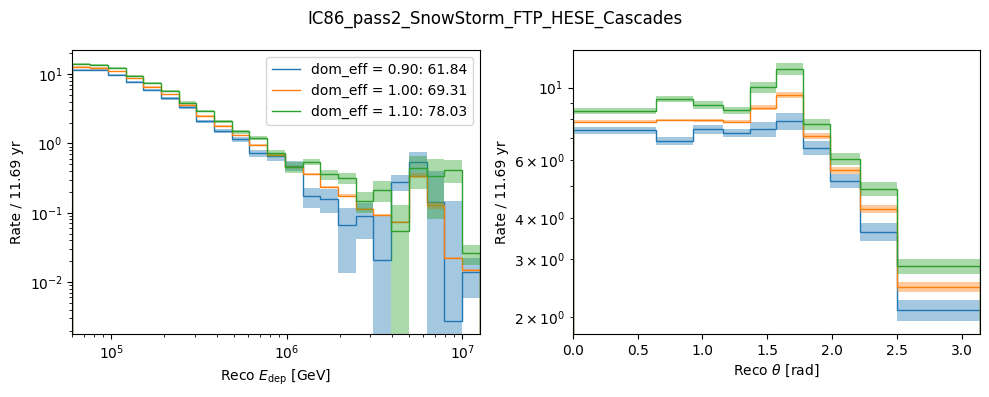

IC86_pass2_SnowStorm_FTP_HESE_Cascades


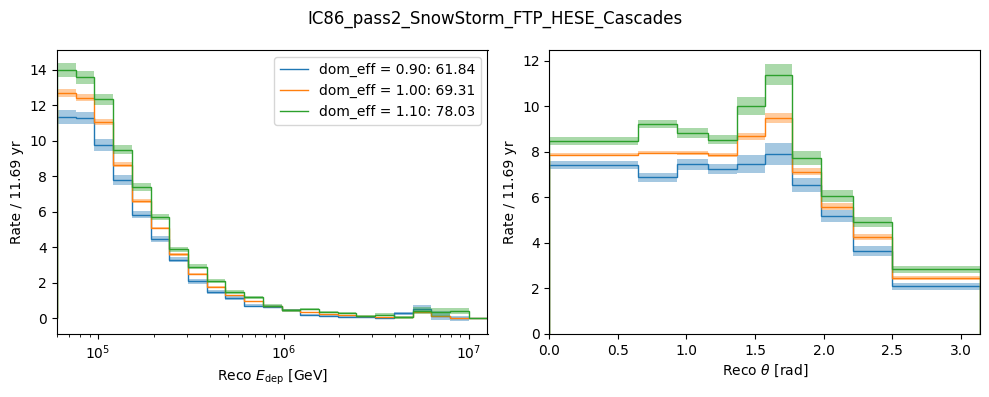

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


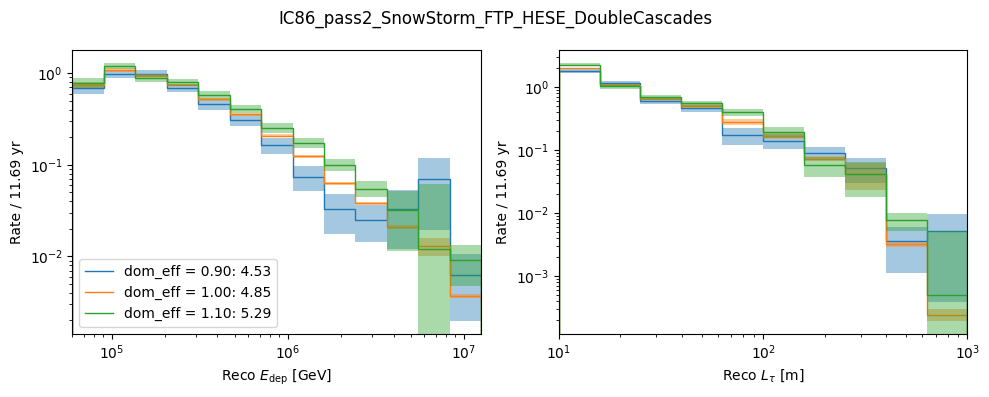

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


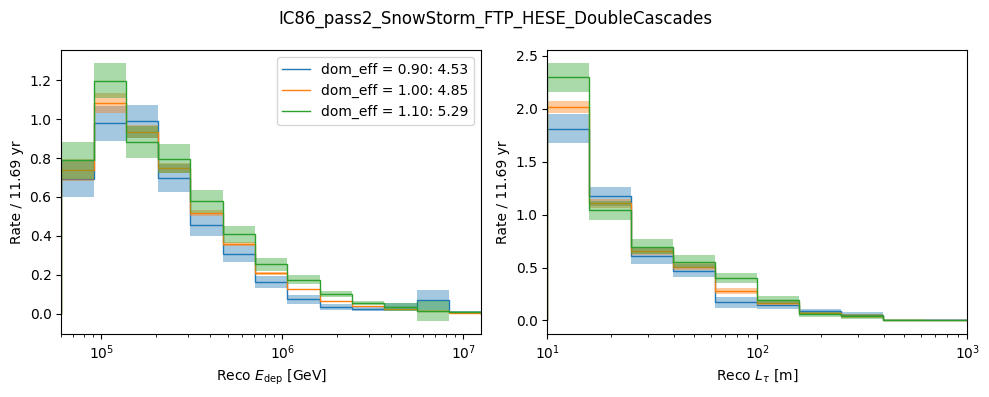

IC86_pass2_SnowStorm_FTP_HESE_Tracks


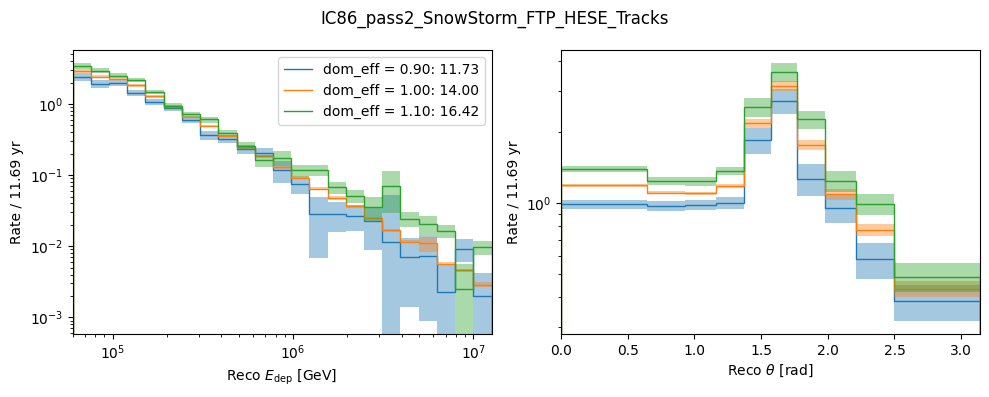

IC86_pass2_SnowStorm_FTP_HESE_Tracks


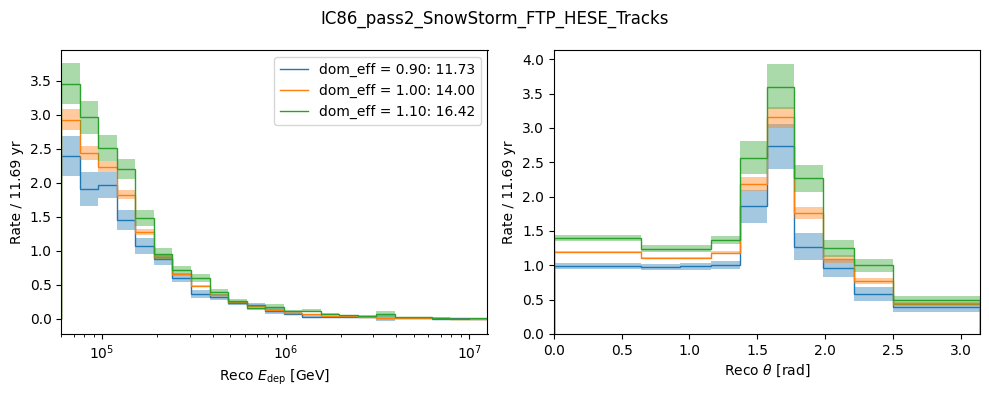

IC86_pass2_SnowStorm_FTP_HESE_Cascades


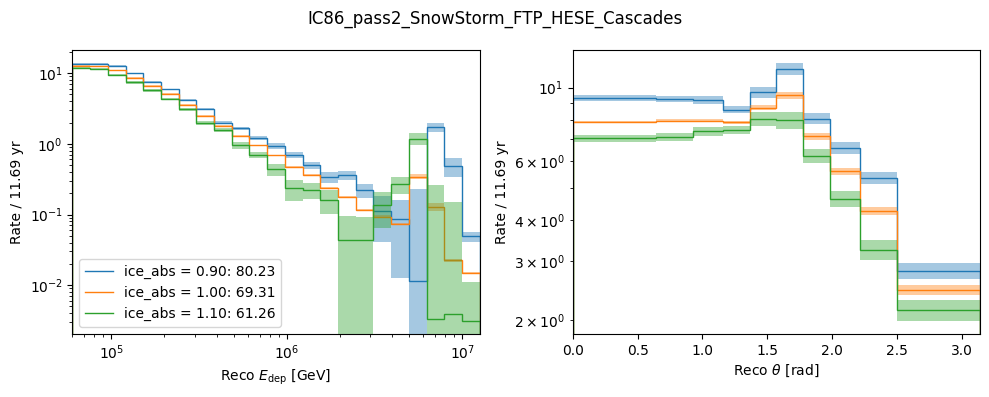

IC86_pass2_SnowStorm_FTP_HESE_Cascades


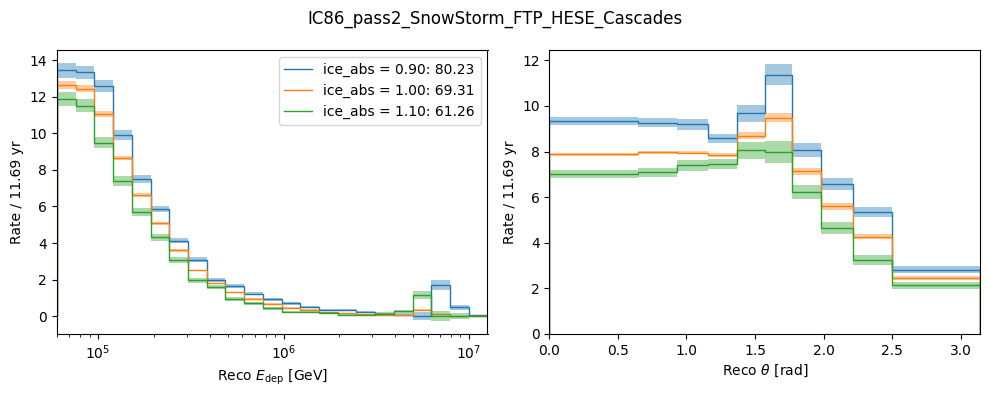

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


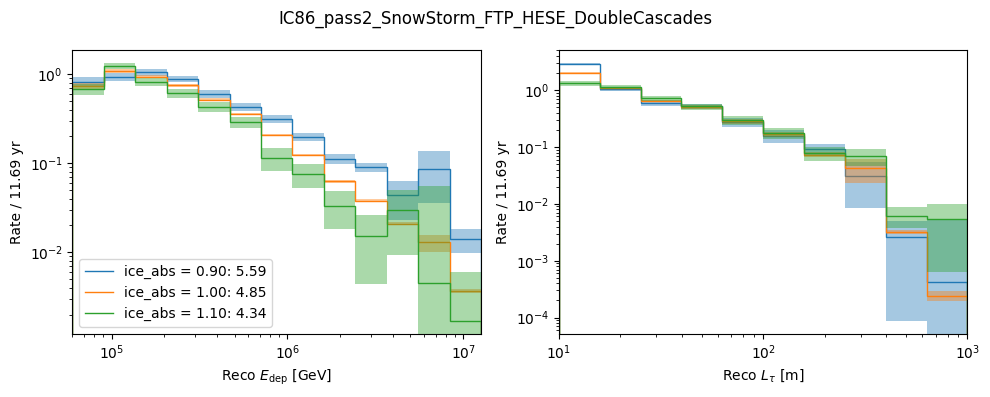

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


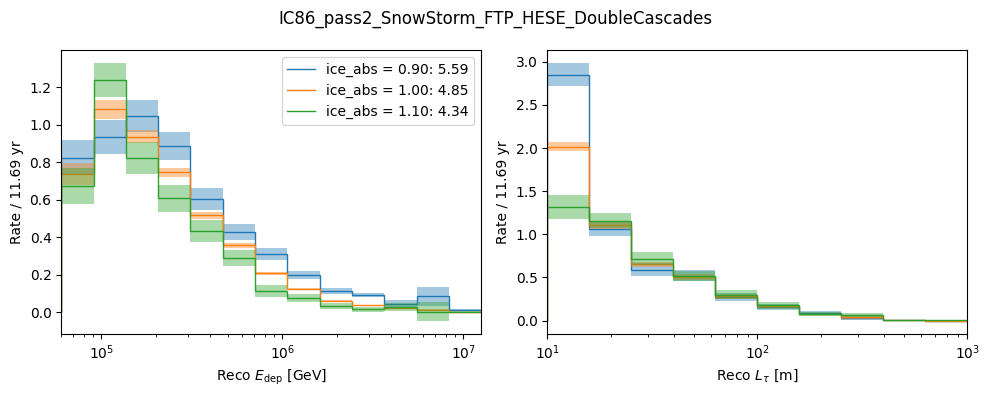

IC86_pass2_SnowStorm_FTP_HESE_Tracks


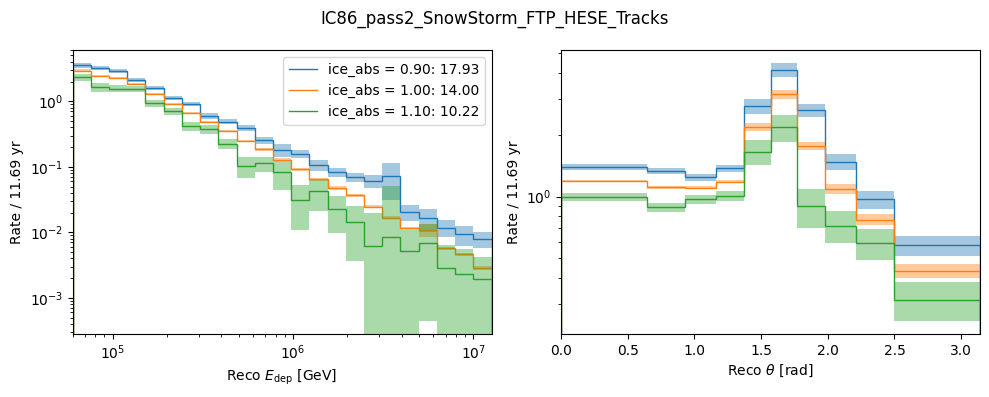

IC86_pass2_SnowStorm_FTP_HESE_Tracks


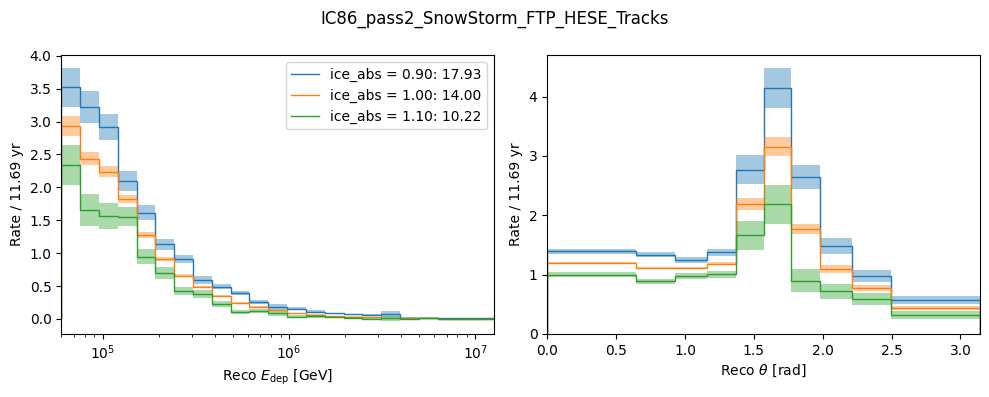

IC86_pass2_SnowStorm_FTP_HESE_Cascades


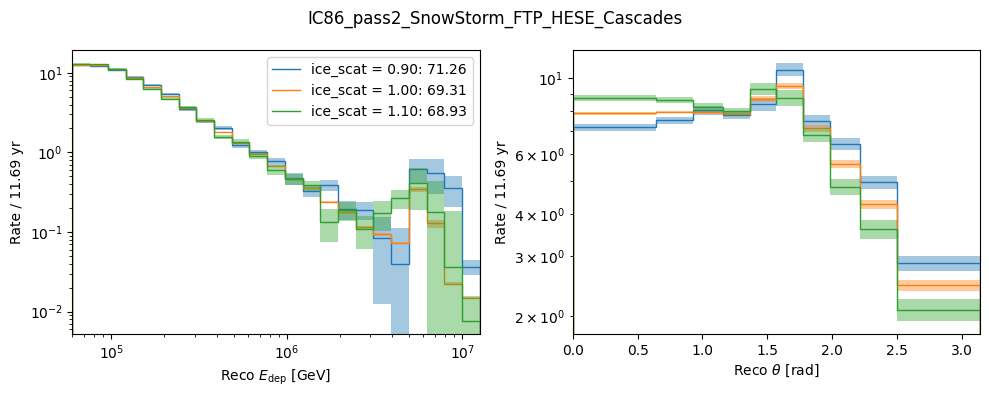

IC86_pass2_SnowStorm_FTP_HESE_Cascades


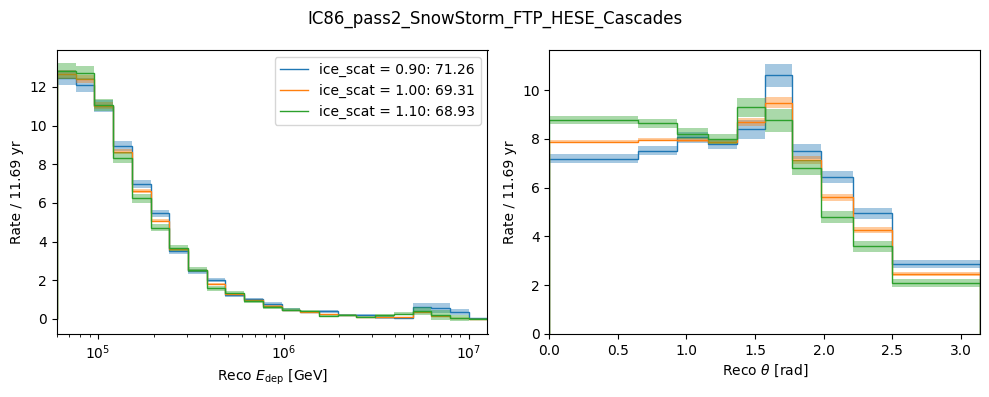

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


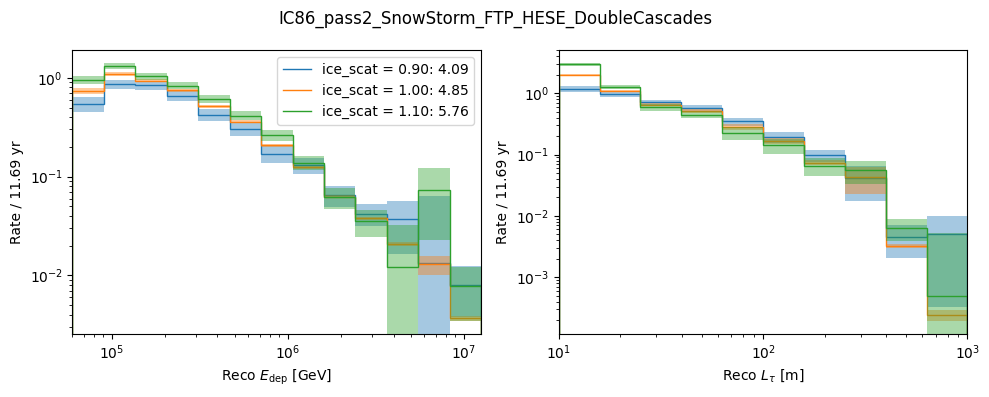

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


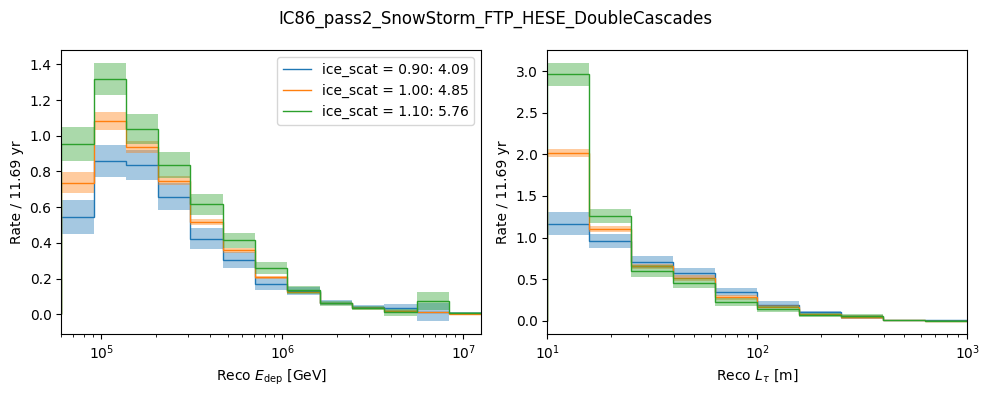

IC86_pass2_SnowStorm_FTP_HESE_Tracks


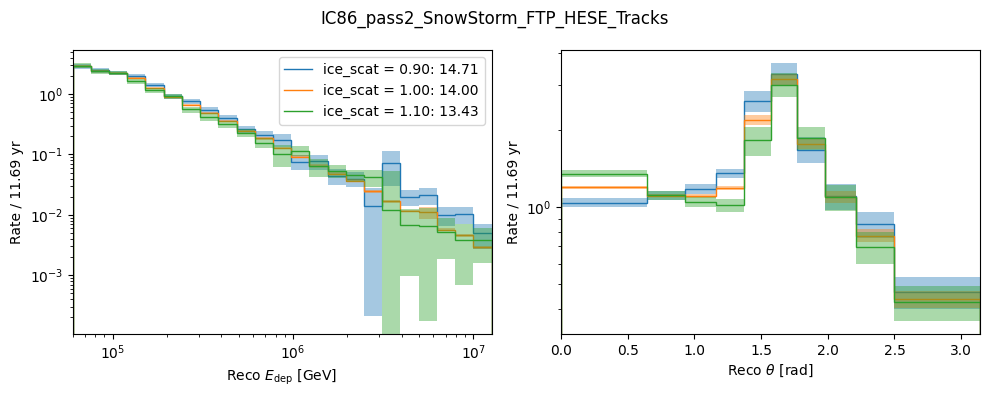

IC86_pass2_SnowStorm_FTP_HESE_Tracks


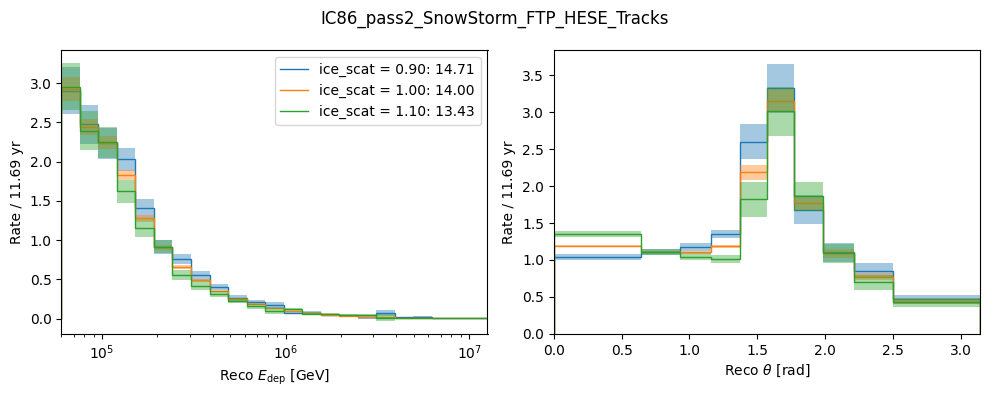

IC86_pass2_SnowStorm_FTP_HESE_Cascades


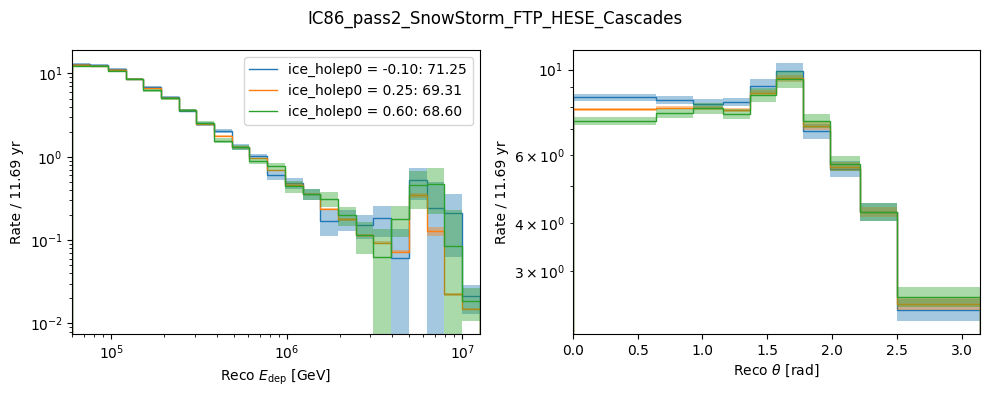

IC86_pass2_SnowStorm_FTP_HESE_Cascades


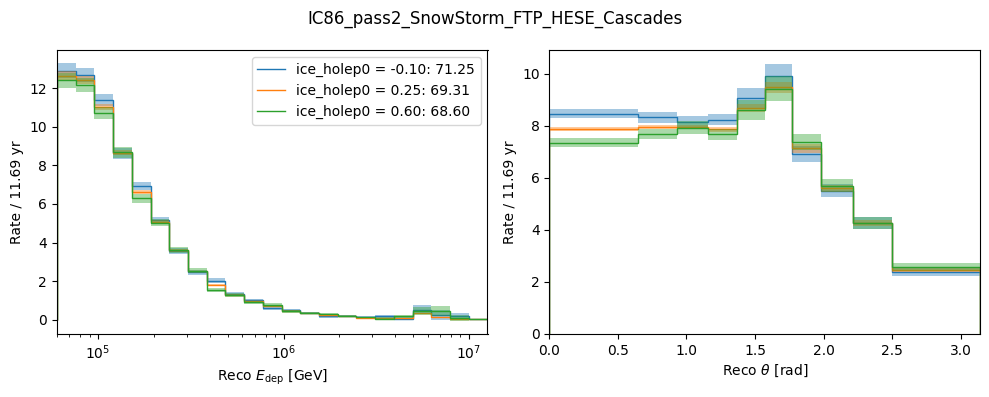

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


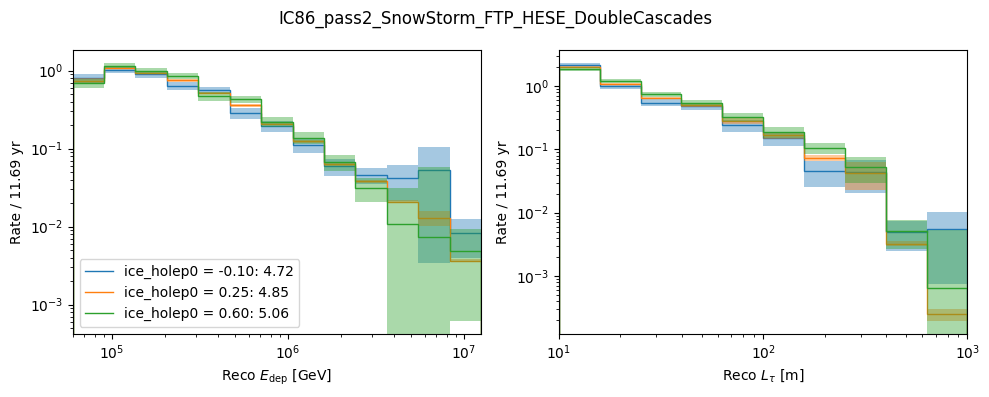

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


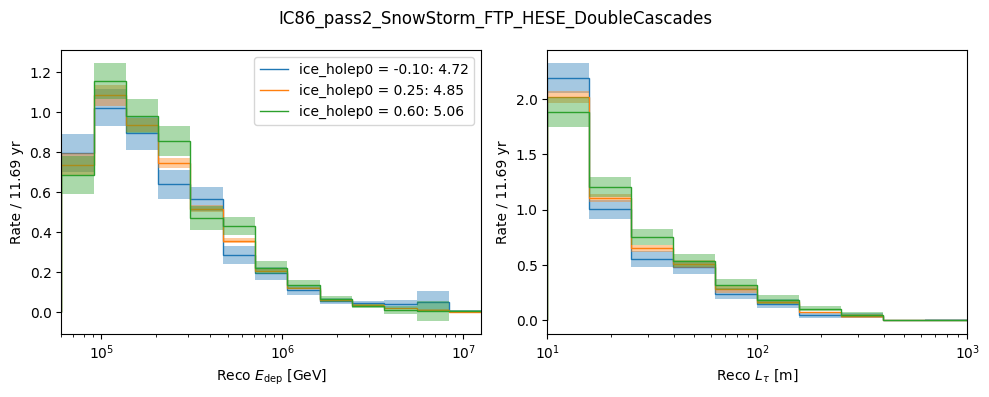

IC86_pass2_SnowStorm_FTP_HESE_Tracks


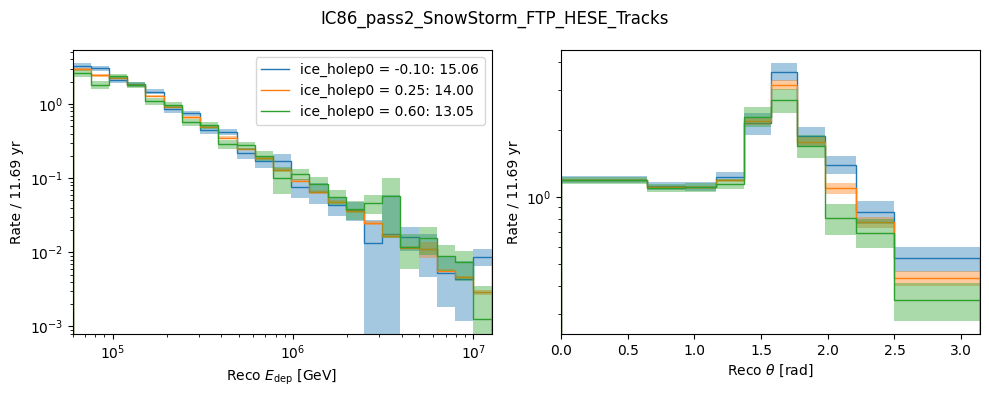

IC86_pass2_SnowStorm_FTP_HESE_Tracks


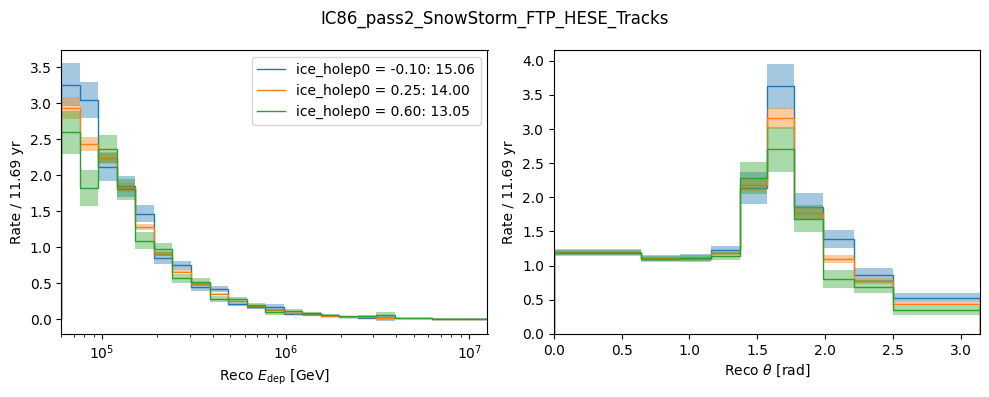

IC86_pass2_SnowStorm_FTP_HESE_Cascades


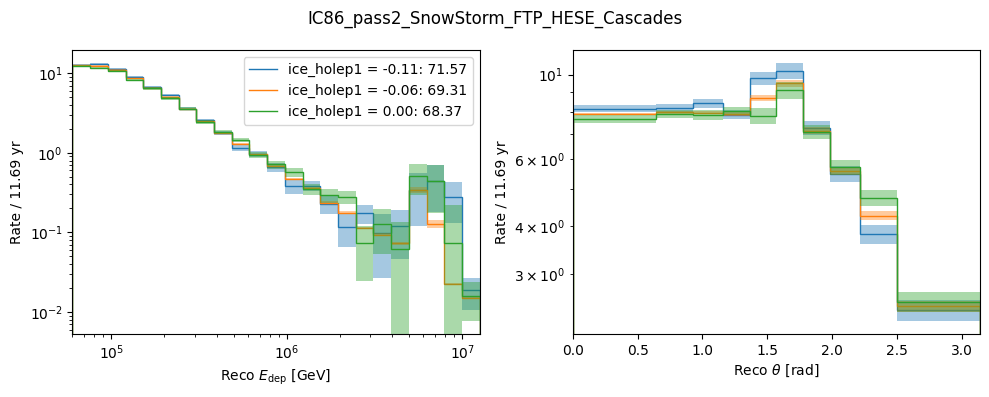

IC86_pass2_SnowStorm_FTP_HESE_Cascades


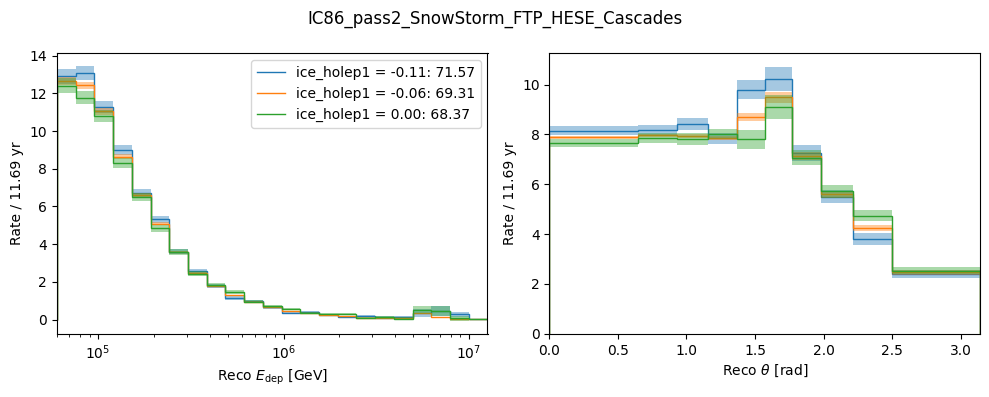

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


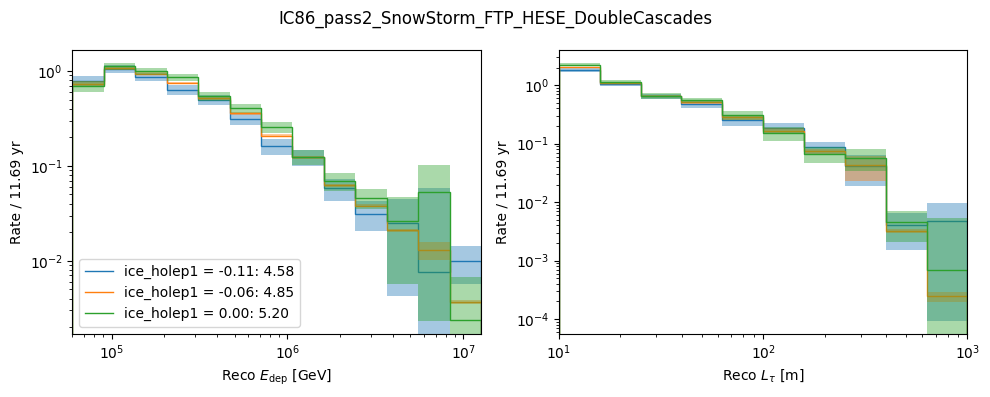

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


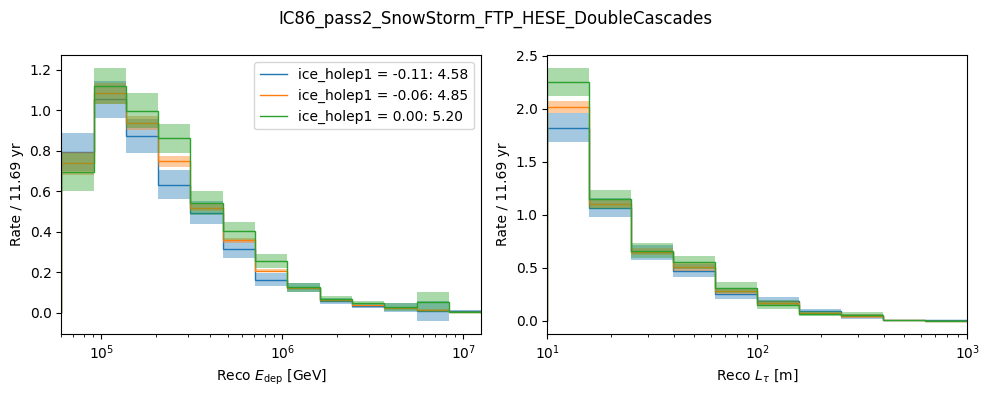

IC86_pass2_SnowStorm_FTP_HESE_Tracks


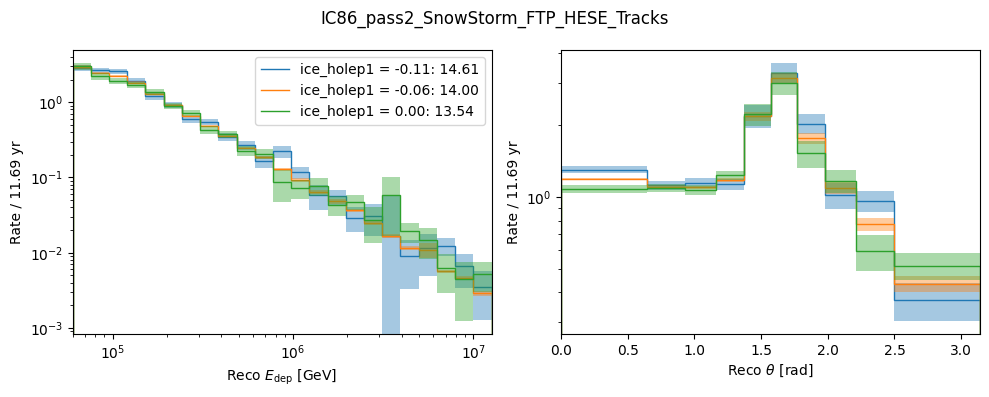

IC86_pass2_SnowStorm_FTP_HESE_Tracks


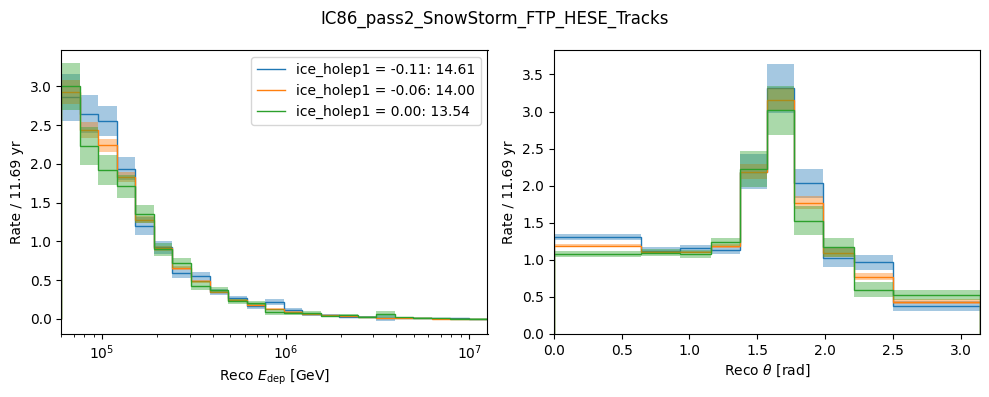

IC86_pass2_SnowStorm_FTP_HESE_Cascades


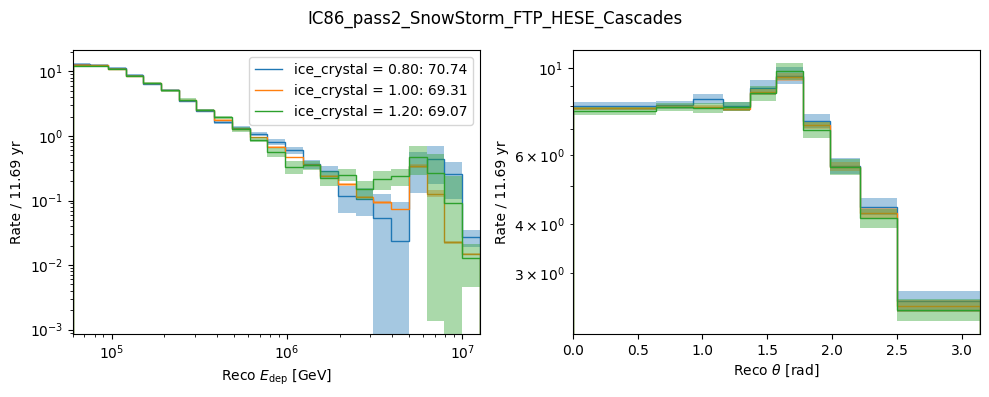

IC86_pass2_SnowStorm_FTP_HESE_Cascades


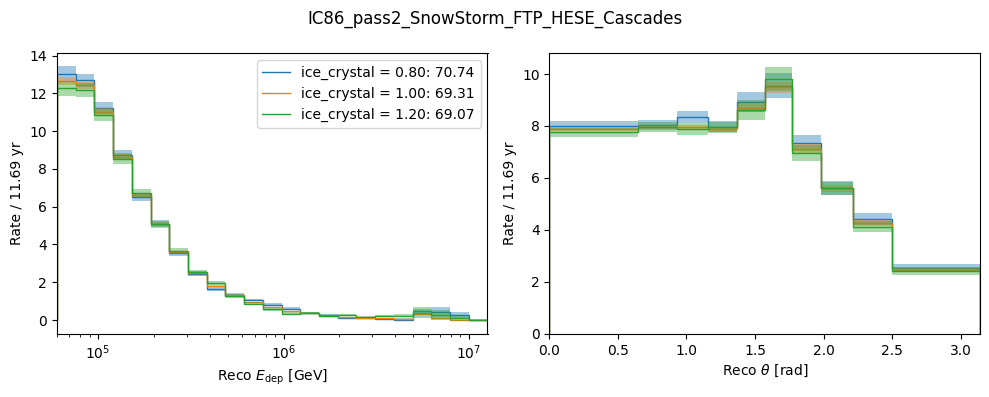

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


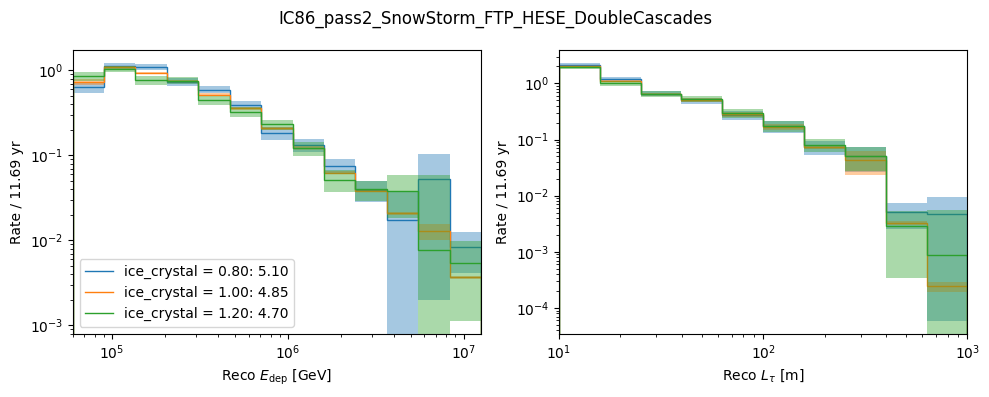

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


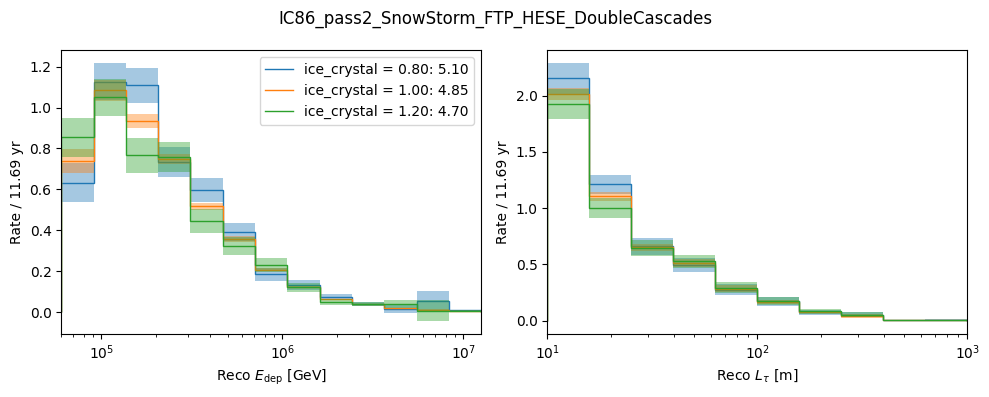

IC86_pass2_SnowStorm_FTP_HESE_Tracks


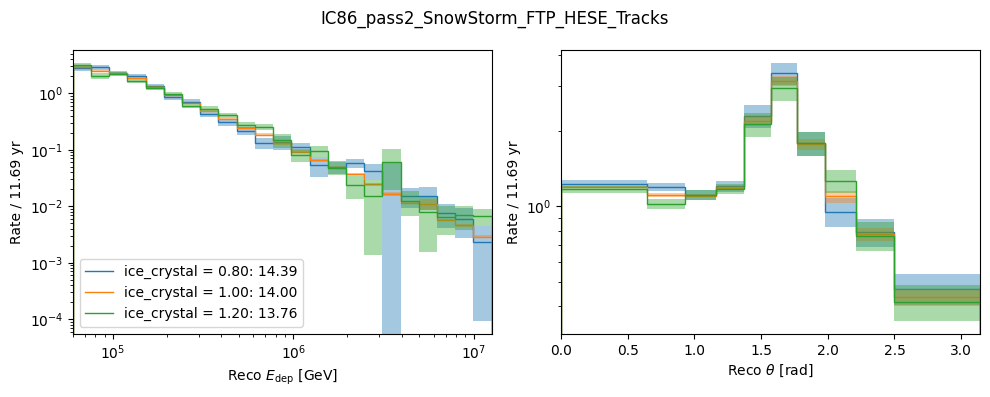

IC86_pass2_SnowStorm_FTP_HESE_Tracks


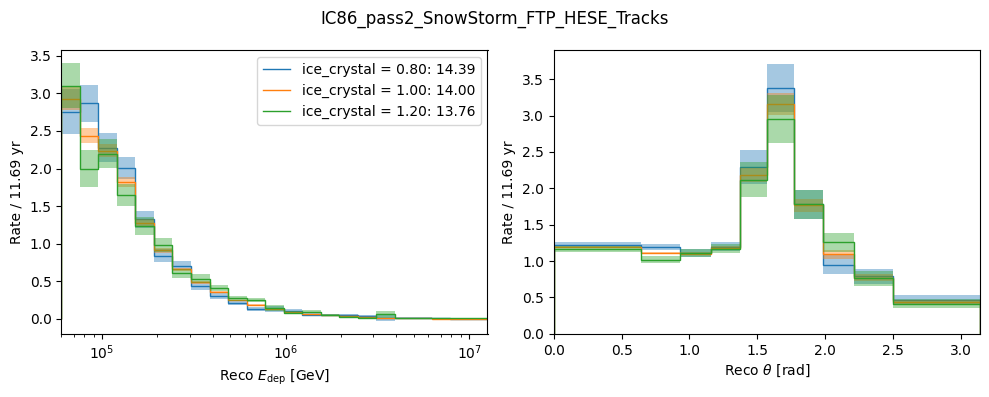

In [54]:
import numpy as np

# Parameter names
param_names = ["dom_eff", "ice_abs", "ice_scat", "ice_holep0", "ice_holep1", "ice_crystal"]

# Default values
default_values = [1.0, 1.0, 1.0, 0.24901831812365854, -0.05678798504997925, 1.0]

# Ranges for each parameter
param_ranges = [
    (0.9, 1.1),           # dom_eff
    (0.9, 1.1),           # ice_abs
    (0.9, 1.1),           # ice_scat
    (-0.1, 0.5980366362473171),   # ice_holep0
    (-0.1135759700999585, 0.0),   # ice_holep1
    (0.8, 1.2)            # ice_crystal
]

# # half ranges
# param_ranges = [
#     (0.95, 1.05),           # dom_eff
#     (0.95, 1.05),           # ice_abs
#     (0.95, 1.05),           # ice_scat
#     (0.07450915906182926, 0.4235274771854878),   # ice_holep0
#     (-0.08518197757496897, -0.028393992524989625),   # ice_holep1
#     (0.9, 1.1)            # ice_crystal
# ]

n_points = 3  # how many points to sample in each range

for i, param in enumerate(param_names):
    # generate values in the range (linear spacing)
    values = np.linspace(param_ranges[i][0], param_ranges[i][1], n_points)

    # build input_variables dict for this parameter
    input_variables = {}
    for val in values:
        params = dict(zip(param_names, default_values))  # start from default
        params[param] = val                             # override current parameter
        input_variables[f"{param} = {val:.2f}"] = params

    # loop over detector configs and plot
    for det_config in detector_configs:
        for ylog in [True,False]:
            plot_histogram(
                hist_graph_hdl=hist_graph_hdl_systematics,
                det_config=det_config,
                input_variables=input_variables,
                ylog=ylog,
                savepath=f"{plotting_path}/{det_config}_{param}_ylog-{ylog}.png"
            )
